#Predicting Flight Delay

##Objective

In this project, we are predicting the delay in departure of flights.The goal of the project is to perform analysis on the flight data to gain valuable insights and build models to predict by how many minutes the flight departure will be delayed, given a set of characteristics. We have used Linear Regression model, Random Forest Regressor model and Decison Tree Regressor model to find the accuracy of our prediction.

##Dataset Description

The dataset was obtained from the Bureau of Transportation Statistics for January 2019.The dataset consist of 583985 records.The link is https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236

The data fields that were selected are explained below:

** SYS_FIELD_NAME	 FIELD_DESC **
* YEAR	Year
* MONTH	Month
* DAY_OF_MONTH	Day of Month
* DAY_OF_WEEK	Day of Week
* FL_DATE	Flight Date (yyyymmdd)
* OP_UNIQUE_CARRIER	Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.
* OP_CARRIER_FL_NUM	Flight Number
* ORIGIN_AIRPORT_ID	Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.  Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.
* ORIGIN_AIRPORT_SEQ_ID	Origin Airport, Airport Sequence ID. An identification number assigned by US DOT to identify a unique airport at a given point of time.  Airport attributes, such as airport name or coordinates, may change over time.
* ORIGIN_CITY_MARKET_ID	Origin Airport, City Market ID. City Market ID is an identification number assigned by US DOT to identify a city market.  Use this field to consolidate airports serving the same city market.
* ORIGIN_CITY_NAME	Origin Airport, City Name
* DEST_AIRPORT_ID	Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.  Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.
* DEST_AIRPORT_SEQ_ID	Destination Airport, Airport Sequence ID. An identification number assigned by US DOT to identify a unique airport at a given point of time.  Airport attributes, such as airport name or coordinates, may change over time.
* DEST_CITY_MARKET_ID	Destination Airport, City Market ID. City Market ID is an identification number assigned by US DOT to identify a city market.  Use this field to consolidate airports serving the same city market.
* DEST_CITY_NAME	Destination Airport, City Name
* DEP_TIME	Actual Departure Time (local time: hhmm)
* DEP_DELAY_NEW	Difference in minutes between scheduled and actual departure time. Early departures set to 0.
* DEP_DEL15	Departure Delay Indicator, 15 Minutes or More (1=Yes)
* ARR_TIME	Actual Arrival Time (local time: hhmm)
* ARR_DELAY_NEW	Difference in minutes between scheduled and actual arrival time. Early arrivals set to 0.
* ARR_DEL15	Arrival Delay Indicator, 15 Minutes or More (1=Yes)
* AIR_TIME	Flight Time, in Minutes
* FLIGHTS	Number of Flights
* DISTANCE	Distance between airports (miles)
* CARRIER_DELAY	Carrier Delay, in Minutes
* WEATHER_DELAY	Weather Delay, in Minutes
* NAS_DELAY	National Air System Delay, in Minutes
* SECURITY_DELAY	Security Delay, in Minutes
* LATE_AIRCRAFT_DELAY	Late Aircraft Delay, in Minutes


Since we are going to predict the departure delay of the flight in minutes, our predictor field is DEP_DELAY_NEW. It is defined as the difference in minutes between scheduled and actual departure time. For, early departures or on-time flights, this field is set to 0.

## To Download the data

Since we didnt get the direct download link from the website, we used curl -L --location Follow redirects and -d -data <data> Send specified data in POST request to download the required csv file.The link is https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236

In [5]:
%sh
curl -L -d "UserTableName=Reporting_Carrier_On_Time_Performance_1987_present&DBShortName=&RawDataTable=T_ONTIME_REPORTING&sqlstr=+SELECT+YEAR%2CMONTH%2CDAY_OF_MONTH%2CDAY_OF_WEEK%2CFL_DATE%2COP_UNIQUE_CARRIER%2COP_CARRIER_AIRLINE_ID%2COP_CARRIER_FL_NUM%2CORIGIN_AIRPORT_ID%2CORIGIN_AIRPORT_SEQ_ID%2CORIGIN_CITY_MARKET_ID%2CORIGIN%2CORIGIN_CITY_NAME%2CORIGIN_STATE_ABR%2CDEST_AIRPORT_ID%2CDEST_AIRPORT_SEQ_ID%2CDEST_CITY_MARKET_ID%2CDEST%2CDEST_CITY_NAME%2CDEST_STATE_ABR%2CDEP_TIME%2CDEP_DELAY%2CDEP_DELAY_NEW%2CDEP_DEL15%2CARR_TIME%2CARR_DELAY%2CARR_DEL15%2CAIR_TIME%2CFLIGHTS%2CDISTANCE%2CCARRIER_DELAY%2CWEATHER_DELAY%2CNAS_DELAY%2CSECURITY_DELAY%2CLATE_AIRCRAFT_DELAY+FROM++T_ONTIME_REPORTING+WHERE+Month+%3D1+AND+YEAR%3D2019&varlist=YEAR%2CMONTH%2CDAY_OF_MONTH%2CDAY_OF_WEEK%2CFL_DATE%2COP_UNIQUE_CARRIER%2COP_CARRIER_AIRLINE_ID%2COP_CARRIER_FL_NUM%2CORIGIN_AIRPORT_ID%2CORIGIN_AIRPORT_SEQ_ID%2CORIGIN_CITY_MARKET_ID%2CORIGIN%2CORIGIN_CITY_NAME%2CORIGIN_STATE_ABR%2CDEST_AIRPORT_ID%2CDEST_AIRPORT_SEQ_ID%2CDEST_CITY_MARKET_ID%2CDEST%2CDEST_CITY_NAME%2CDEST_STATE_ABR%2CDEP_TIME%2CDEP_DELAY%2CDEP_DELAY_NEW%2CDEP_DEL15%2CARR_TIME%2CARR_DELAY%2CARR_DEL15%2CAIR_TIME%2CFLIGHTS%2CDISTANCE%2CCARRIER_DELAY%2CWEATHER_DELAY%2CNAS_DELAY%2CSECURITY_DELAY%2CLATE_AIRCRAFT_DELAY&grouplist=&suml=&sumRegion=&filter1=title%3D&filter2=title%3D&geo=All%A0&time=January&timename=Month&GEOGRAPHY=All&XYEAR=2019&FREQUENCY=1&VarName=YEAR&VarDesc=Year&VarType=Num&VarDesc=Quarter&VarType=Num&VarName=MONTH&VarDesc=Month&VarType=Num&VarName=DAY_OF_MONTH&VarDesc=DayofMonth&VarType=Num&VarName=DAY_OF_WEEK&VarDesc=DayOfWeek&VarType=Num&VarName=FL_DATE&VarDesc=FlightDate&VarType=Char&VarName=OP_UNIQUE_CARRIER&VarDesc=Reporting_Airline&VarType=Char&VarName=OP_CARRIER_AIRLINE_ID&VarDesc=DOT_ID_Reporting_Airline&VarType=Num&VarDesc=IATA_CODE_Reporting_Airline&VarType=Char&VarDesc=Tail_Number&VarType=Char&VarName=OP_CARRIER_FL_NUM&VarDesc=Flight_Number_Reporting_Airline&VarType=Char&VarName=ORIGIN_AIRPORT_ID&VarDesc=OriginAirportID&VarType=Num&VarName=ORIGIN_AIRPORT_SEQ_ID&VarDesc=OriginAirportSeqID&VarType=Num&VarName=ORIGIN_CITY_MARKET_ID&VarDesc=OriginCityMarketID&VarType=Num&VarName=ORIGIN&VarDesc=Origin&VarType=Char&VarName=ORIGIN_CITY_NAME&VarDesc=OriginCityName&VarType=Char&VarName=ORIGIN_STATE_ABR&VarDesc=OriginState&VarType=Char&VarDesc=OriginStateFips&VarType=Char&VarDesc=OriginStateName&VarType=Char&VarDesc=OriginWac&VarType=Num&VarName=DEST_AIRPORT_ID&VarDesc=DestAirportID&VarType=Num&VarName=DEST_AIRPORT_SEQ_ID&VarDesc=DestAirportSeqID&VarType=Num&VarName=DEST_CITY_MARKET_ID&VarDesc=DestCityMarketID&VarType=Num&VarName=DEST&VarDesc=Dest&VarType=Char&VarName=DEST_CITY_NAME&VarDesc=DestCityName&VarType=Char&VarName=DEST_STATE_ABR&VarDesc=DestState&VarType=Char&VarDesc=DestStateFips&VarType=Char&VarDesc=DestStateName&VarType=Char&VarDesc=DestWac&VarType=Num&VarDesc=CRSDepTime&VarType=Char&VarName=DEP_TIME&VarDesc=DepTime&VarType=Char&VarName=DEP_DELAY&VarDesc=DepDelay&VarType=Num&VarName=DEP_DELAY_NEW&VarDesc=DepDelayMinutes&VarType=Num&VarName=DEP_DEL15&VarDesc=DepDel15&VarType=Num&VarDesc=DepartureDelayGroups&VarType=Num&VarDesc=DepTimeBlk&VarType=Char&VarDesc=TaxiOut&VarType=Num&VarDesc=WheelsOff&VarType=Char&VarDesc=WheelsOn&VarType=Char&VarDesc=TaxiIn&VarType=Num&VarDesc=CRSArrTime&VarType=Char&VarName=ARR_TIME&VarDesc=ArrTime&VarType=Char&VarName=ARR_DELAY&VarDesc=ArrDelay&VarType=Num&VarDesc=ArrDelayMinutes&VarType=Num&VarName=ARR_DEL15&VarDesc=ArrDel15&VarType=Num&VarDesc=ArrivalDelayGroups&VarType=Num&VarDesc=ArrTimeBlk&VarType=Char&VarDesc=Cancelled&VarType=Num&VarDesc=CancellationCode&VarType=Char&VarDesc=Diverted&VarType=Num&VarDesc=CRSElapsedTime&VarType=Num&VarDesc=ActualElapsedTime&VarType=Num&VarName=AIR_TIME&VarDesc=AirTime&VarType=Num&VarName=FLIGHTS&VarDesc=Flights&VarType=Num&VarName=DISTANCE&VarDesc=Distance&VarType=Num&VarDesc=DistanceGroup&VarType=Num&VarName=CARRIER_DELAY&VarDesc=CarrierDelay&VarType=Num&VarName=WEATHER_DELAY&VarDesc=WeatherDelay&VarType=Num&VarName=NAS_DELAY&VarDesc=NASDelay&VarType=Num&VarName=SECURITY_DELAY&VarDesc=SecurityDelay&VarType=Num&VarName=LATE_AIRCRAFT_DELAY&VarDesc=LateAircraftDelay&VarType=Num&VarDesc=FirstDepTime&VarType=Char&VarDesc=TotalAddGTime&VarType=Num&VarDesc=LongestAddGTime&VarType=Num&VarDesc=DivAirportLandings&VarType=Num&VarDesc=DivReachedDest&VarType=Num&VarDesc=DivActualElapsedTime&VarType=Num&VarDesc=DivArrDelay&VarType=Num&VarDesc=DivDistance&VarType=Num&VarDesc=Div1Airport&VarType=Char&VarDesc=Div1AirportID&VarType=Num&VarDesc=Div1AirportSeqID&VarType=Num&VarDesc=Div1WheelsOn&VarType=Char&VarDesc=Div1TotalGTime&VarType=Num&VarDesc=Div1LongestGTime&VarType=Num&VarDesc=Div1WheelsOff&VarType=Char&VarDesc=Div1TailNum&VarType=Char&VarDesc=Div2Airport&VarType=Char&VarDesc=Div2AirportID&VarType=Num&VarDesc=Div2AirportSeqID&VarType=Num&VarDesc=Div2WheelsOn&VarType=Char&VarDesc=Div2TotalGTime&VarType=Num&VarDesc=Div2LongestGTime&VarType=Num&VarDesc=Div2WheelsOff&VarType=Char&VarDesc=Div2TailNum&VarType=Char&VarDesc=Div3Airport&VarType=Char&VarDesc=Div3AirportID&VarType=Num&VarDesc=Div3AirportSeqID&VarType=Num&VarDesc=Div3WheelsOn&VarType=Char&VarDesc=Div3TotalGTime&VarType=Num&VarDesc=Div3LongestGTime&VarType=Num&VarDesc=Div3WheelsOff&VarType=Char&VarDesc=Div3TailNum&VarType=Char&VarDesc=Div4Airport&VarType=Char&VarDesc=Div4AirportID&VarType=Num&VarDesc=Div4AirportSeqID&VarType=Num&VarDesc=Div4WheelsOn&VarType=Char&VarDesc=Div4TotalGTime&VarType=Num&VarDesc=Div4LongestGTime&VarType=Num&VarDesc=Div4WheelsOff&VarType=Char&VarDesc=Div4TailNum&VarType=Char&VarDesc=Div5Airport&VarType=Char&VarDesc=Div5AirportID&VarType=Num&VarDesc=Div5AirportSeqID&VarType=Num&VarDesc=Div5WheelsOn&VarType=Char&VarDesc=Div5TotalGTime&VarType=Num&VarDesc=Div5LongestGTime&VarType=Num&VarDesc=Div5WheelsOff&VarType=Char&VarDesc=Div5TailNum&VarType=Char" "https://www.transtats.bts.gov/DownLoad_Table.asp?Table_ID=236&Has_Group=3&Is_Zipped=0" > m1.zip

% Total % Received % Xferd Average Speed Time Time Time Current
 Dload Upload Total Spent Left Speed

 0 0 0 0 0 0 0 0 --:--:-- --:--:-- --:--:-- 0
100 5847 0 0 100 5847 0 3631 0:00:01 0:00:01 --:--:-- 3633
100 5847 0 0 100 5847 0 2239 0:00:02 0:00:02 --:--:-- 2240
100 5847 0 0 100 5847 0 1617 0:00:03 0:00:03 --:--:-- 1617
100 5847 0 0 100 5847 0 1266 0:00:04 0:00:04 --:--:-- 1266
100 5847 0 0 100 5847 0 1040 0:00:05 0:00:05 --:--:-- 1040
100 5847 0 0 100 5847 0 883 0:00:06 0:00:06 --:--:-- 0
100 5847 0 0 100 5847 0 767 0:00:07 0:00:07 --:--:-- 0
100 5847 0 0 100 5847 0 678 0:00:08 0:00:08 --:--:-- 0
100 5847 0 0 100 5847 0 607 0:00:09 0:00:09 --:--:-- 0
100 5847 0 0 100 5847 0 550 0:00:10 0:00:10 --:--:-- 0
100 5847 0 0 100 5847 0 502 0:00:11 0:00:11 --:--:-- 0
100 6048 100 201 100 5847 16 487 0:00:12 0:00:12 --:--:-- 0
100 6048 100 201 100 5847 16 487 0:00:12 0:00:12 --:--:-- 0

 0 12.4M 0 24346 0 0 1881 0 1:55:29 0:00:12 1:55:17 1881
 5 12.4M 5 677k 0 0 49949 0 0:04:20 0:00:13 0:04:07 691k
 11 12.4M 11 1409k 0 0 96950 0 0:02:14 0:00:14 0:02:00 712k
 16 12.4M 16 2129k 0 0 134k 0 0:01:34 0:00:15 0:01:19 719k
 18 12.4M 18 2342k 0 0 138k 0 0:01:31 0:00:16 0:01:15 591k
 22 12.4M 22 2846k 0 0 159k 0 0:01:19 0:00:17 0:01:02 570k
 26 12.4M 26 3396k 0 0 178k 0 0:01:11 0:00:18 0:00:53 533k
 26 12.4M 26 3425k 0 0 172k 0 0:01:13 0:00:19 0:00:54 401k
 28 12.4M 28 3574k 0 0 171k 0 0:01:14 0:00:20 0:00:54 289k
 30 12.4M 30 3876k 0 0 177k 0 0:01:11 0:00:21 0:00:50 304k
 34 12.4M 34 4380k 0 0 191k 0 0:01:06 0:00:22 0:00:44 304k
 39 12.4M 39 5028k 0 0 210k 0 0:01:00 0:00:23 0:00:37 333k
 45 12.4M 45 5770k 0 0 232k 0 0:00:54 0:00:24 0:00:30 472k
 50 12.4M 50 6476k 0 0 250k 0 0:00:50 0:00:25 0:00:25 579k
 56 12.4M 56 7236k 0 0 269k 0 0:00:47 0:00:26 0:00:21 671k
 62 12.4M 62 7979k 0 0 286k 0 0:00:44 0:00:27 0:00:17 729k
 68 12.4M 68 8677k 0 0 300k 0 0:00:42 0:00:28 0:00:14 730k
 74 12.4M 74 9434k 0 0 315k 0 0:00:40 0:00:29 0:00:11 733k
 78 12.4M 78 9.7M 0 0 324k 0 0:00:39 0:00:30 0:00:09 701k
 80 12.4M 80 10.0M 0 0 322k 0 0:00:39 0:00:31 0:00:08 608k
 85 12.4M 85 10.6M 0 0 330k 0 0:00:38 0:00:32 0:00:06 571k
 90 12.4M 90 11.2M 0 0 341k 0 0:00:37 0:00:33 0:00:04 577k
 93 12.4M 93 11.5M 0 0 339k 0 0:00:37 0:00:34 0:00:03 478k
 93 12.4M 93 11.6M 0 0 332k 0 0:00:38 0:00:35 0:00:03 381k
 95 12.4M 95 11.8M 0 0 328k 0 0:00:38 0:00:36 0:00:02 371k
 98 12.4M 98 12.2M 0 0 329k 0 0:00:38 0:00:37 0:00:01 328k
100 12.4M 100 12.4M 0 0 332k 0 0:00:38 0:00:38 --:--:-- 262k

## To remove any old csv file which gets generated for each download and to unzip m1 folder

In [7]:
%sh
rm -rf m1
unzip m1.zip -d m1
ls m1/*.csv | head -1 | xargs -i@ mv @ m1project.csv

Archive: m1.zip
 inflating: m1/652881134_T_ONTIME_REPORTING.csv

###To read the csv file and store it in a dataframe

In [9]:
df = spark.read.csv(path='file:///databricks/driver/m1project.csv',header='true', inferSchema ='true', sep=',', mode='DROPMALFORMED')

In [10]:
display(df.limit(50))

YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DEL15,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,_c35
2019,1,19,6,2019-01-19T00:00:00.000+0000,9E,20363,5245,13487,1348702,31650,MSP,"Minneapolis, MN",MN,11193,1119302,33105,CVG,"Cincinnati, OH",KY,1546,-10.0,0.0,0.0,1832,-25.0,0.0,87.0,1.0,596.0,null,null,null,null,null,null
2019,1,20,7,2019-01-20T00:00:00.000+0000,9E,20363,5245,13487,1348702,31650,MSP,"Minneapolis, MN",MN,11193,1119302,33105,CVG,"Cincinnati, OH",KY,1552,-4.0,0.0,0.0,1825,-37.0,0.0,76.0,1.0,596.0,null,null,null,null,null,null
2019,1,21,1,2019-01-21T00:00:00.000+0000,9E,20363,5245,13487,1348702,31650,MSP,"Minneapolis, MN",MN,11193,1119302,33105,CVG,"Cincinnati, OH",KY,1547,-9.0,0.0,0.0,1845,-17.0,0.0,76.0,1.0,596.0,null,null,null,null,null,null
2019,1,22,2,2019-01-22T00:00:00.000+0000,9E,20363,5245,13487,1348702,31650,MSP,"Minneapolis, MN",MN,11193,1119302,33105,CVG,"Cincinnati, OH",KY,1552,-4.0,0.0,0.0,1839,-23.0,0.0,81.0,1.0,596.0,null,null,null,null,null,null
2019,1,23,3,2019-01-23T00:00:00.000+0000,9E,20363,5245,13487,1348702,31650,MSP,"Minneapolis, MN",MN,11193,1119302,33105,CVG,"Cincinnati, OH",KY,1550,-6.0,0.0,0.0,1850,-12.0,0.0,92.0,1.0,596.0,null,null,null,null,null,null
2019,1,24,4,2019-01-24T00:00:00.000+0000,9E,20363,5245,13487,1348702,31650,MSP,"Minneapolis, MN",MN,11193,1119302,33105,CVG,"Cincinnati, OH",KY,1617,21.0,21.0,1.0,1905,3.0,0.0,81.0,1.0,596.0,null,null,null,null,null,null
2019,1,25,5,2019-01-25T00:00:00.000+0000,9E,20363,5245,13487,1348702,31650,MSP,"Minneapolis, MN",MN,11193,1119302,33105,CVG,"Cincinnati, OH",KY,1601,5.0,5.0,0.0,1842,-20.0,0.0,76.0,1.0,596.0,null,null,null,null,null,null
2019,1,26,6,2019-01-26T00:00:00.000+0000,9E,20363,5245,13487,1348702,31650,MSP,"Minneapolis, MN",MN,11193,1119302,33105,CVG,"Cincinnati, OH",KY,1554,-2.0,0.0,0.0,1851,-6.0,0.0,78.0,1.0,596.0,null,null,null,null,null,null
2019,1,27,7,2019-01-27T00:00:00.000+0000,9E,20363,5245,13487,1348702,31650,MSP,"Minneapolis, MN",MN,11193,1119302,33105,CVG,"Cincinnati, OH",KY,1550,-6.0,0.0,0.0,1832,-30.0,0.0,74.0,1.0,596.0,null,null,null,null,null,null
2019,1,28,1,2019-01-28T00:00:00.000+0000,9E,20363,5245,13487,1348702,31650,MSP,"Minneapolis, MN",MN,11193,1119302,33105,CVG,"Cincinnati, OH",KY,1934,218.0,218.0,1.0,2251,229.0,1.0,86.0,1.0,596.0,0.0,218.0,11.0,0.0,0.0,null


In [11]:
df.printSchema()

root
-- YEAR: integer (nullable = true)
-- MONTH: integer (nullable = true)
-- DAY_OF_MONTH: integer (nullable = true)
-- DAY_OF_WEEK: integer (nullable = true)
-- FL_DATE: timestamp (nullable = true)
-- OP_UNIQUE_CARRIER: string (nullable = true)
-- OP_CARRIER_AIRLINE_ID: integer (nullable = true)
-- OP_CARRIER_FL_NUM: integer (nullable = true)
-- ORIGIN_AIRPORT_ID: integer (nullable = true)
-- ORIGIN_AIRPORT_SEQ_ID: integer (nullable = true)
-- ORIGIN_CITY_MARKET_ID: integer (nullable = true)
-- ORIGIN: string (nullable = true)
-- ORIGIN_CITY_NAME: string (nullable = true)
-- ORIGIN_STATE_ABR: string (nullable = true)
-- DEST_AIRPORT_ID: integer (nullable = true)
-- DEST_AIRPORT_SEQ_ID: integer (nullable = true)
-- DEST_CITY_MARKET_ID: integer (nullable = true)
-- DEST: string (nullable = true)
-- DEST_CITY_NAME: string (nullable = true)
-- DEST_STATE_ABR: string (nullable = true)
-- DEP_TIME: integer (nullable = true)
-- DEP_DELAY: double (nullable = true)
-- DEP_DELAY_NEW: double (nullable = true)
-- DEP_DEL15: double (nullable = true)
-- ARR_TIME: integer (nullable = true)
-- ARR_DELAY: double (nullable = true)
-- ARR_DEL15: double (nullable = true)
-- AIR_TIME: double (nullable = true)
-- FLIGHTS: double (nullable = true)
-- DISTANCE: double (nullable = true)
-- CARRIER_DELAY: double (nullable = true)
-- WEATHER_DELAY: double (nullable = true)
-- NAS_DELAY: double (nullable = true)
-- SECURITY_DELAY: double (nullable = true)
-- LATE_AIRCRAFT_DELAY: double (nullable = true)
-- _c35: string (nullable = true)

## Data Cleaning 
* We have cleaned the data by removing the null values for the required fields. No other cleaning was necessary for our dataset.

In [13]:
print("Number of records: " + str(df.count()))
df = df.na.drop(subset=["CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY"])
df=df.drop('_c29')
print("Number of records after cleaning: " + str(df.count()))

Number of records: 583985
Number of records after cleaning: 105222

In [14]:
display(df.limit(10))

YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DEL15,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,_c35
2019,1,28,1,2019-01-28T00:00:00.000+0000,9E,20363,5245,13487,1348702,31650,MSP,"Minneapolis, MN",MN,11193,1119302,33105,CVG,"Cincinnati, OH",KY,1934,218.0,218.0,1.0,2251,229.0,1.0,86.0,1.0,596.0,0.0,218.0,11.0,0.0,0.0,null
2019,1,18,5,2019-01-18T00:00:00.000+0000,9E,20363,5246,13495,1349505,33495,MSY,"New Orleans, LA",LA,12953,1295304,31703,LGA,"New York, NY",NY,555,-6.0,0.0,0.0,1019,19.0,1.0,145.0,1.0,1183.0,0.0,0.0,19.0,0.0,0.0,null
2019,1,21,1,2019-01-21T00:00:00.000+0000,9E,20363,5246,13495,1349505,33495,MSY,"New Orleans, LA",LA,12953,1295304,31703,LGA,"New York, NY",NY,554,-7.0,0.0,0.0,1019,19.0,1.0,144.0,1.0,1183.0,0.0,0.0,19.0,0.0,0.0,null
2019,1,22,2,2019-01-22T00:00:00.000+0000,9E,20363,5246,13495,1349505,33495,MSY,"New Orleans, LA",LA,12953,1295304,31703,LGA,"New York, NY",NY,823,142.0,142.0,1.0,1216,136.0,1.0,143.0,1.0,1183.0,136.0,0.0,0.0,0.0,0.0,null
2019,1,25,5,2019-01-25T00:00:00.000+0000,9E,20363,5246,13495,1349505,33495,MSY,"New Orleans, LA",LA,12953,1295304,31703,LGA,"New York, NY",NY,901,180.0,180.0,1.0,1234,154.0,1.0,132.0,1.0,1183.0,154.0,0.0,0.0,0.0,0.0,null
2019,1,8,2,2019-01-08T00:00:00.000+0000,9E,20363,5247,14100,1410005,34100,PHL,"Philadelphia, PA",PA,14492,1449202,34492,RDU,"Raleigh/Durham, NC",NC,1048,136.0,136.0,1.0,1215,112.0,1.0,60.0,1.0,337.0,0.0,0.0,0.0,0.0,112.0,null
2019,1,18,5,2019-01-18T00:00:00.000+0000,9E,20363,5247,14100,1410005,34100,PHL,"Philadelphia, PA",PA,14492,1449202,34492,RDU,"Raleigh/Durham, NC",NC,820,-12.0,0.0,0.0,1101,38.0,1.0,54.0,1.0,337.0,0.0,0.0,38.0,0.0,0.0,null
2019,1,21,1,2019-01-21T00:00:00.000+0000,9E,20363,5247,14100,1410005,34100,PHL,"Philadelphia, PA",PA,14492,1449202,34492,RDU,"Raleigh/Durham, NC",NC,1031,119.0,119.0,1.0,1153,90.0,1.0,53.0,1.0,337.0,0.0,0.0,0.0,0.0,90.0,null
2019,1,25,5,2019-01-25T00:00:00.000+0000,9E,20363,5247,14100,1410005,34100,PHL,"Philadelphia, PA",PA,14492,1449202,34492,RDU,"Raleigh/Durham, NC",NC,820,-12.0,0.0,0.0,1054,31.0,1.0,65.0,1.0,337.0,0.0,0.0,31.0,0.0,0.0,null
2019,1,8,2,2019-01-08T00:00:00.000+0000,9E,20363,5247,14492,1449202,34492,RDU,"Raleigh/Durham, NC",NC,14100,1410005,34100,PHL,"Philadelphia, PA",PA,848,138.0,138.0,1.0,1028,141.0,1.0,56.0,1.0,337.0,138.0,0.0,3.0,0.0,0.0,null


### Display a summary of the stats: count, mean, stddev, min, etc.

In [16]:

display(df.describe())

summary,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DEL15,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,_c35
count,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,105222,0
mean,2019.0,1.0,16.506624090019198,3.835528691718462,null,20043.398405276464,2669.301695462926,12683.378238391211,1268341.7947482467,31734.14373420007,null,null,null,12705.332069339112,1270537.1447035791,31777.167512497388,null,null,null,1480.3608941095968,62.05727889604835,62.655471289274104,0.7440269145235787,1552.2947102317005,68.0731215905419,1.0,116.53539183820874,1.0,806.6174374180305,20.10608047746669,4.428551063465815,18.508391781186443,0.07950808766227595,24.950590180760678,null
stddev,5.906172158195641E-14,2.8838731241189654E-17,9.074030017908525,1.896149180839052,null,368.958558275994,1838.2017283291689,1479.9626205361144,147996.1923979261,1257.4966640761118,null,null,null,1487.5214882955208,148752.04574424686,1273.7184761097994,null,null,null,492.49523628483075,94.8070505966536,94.3910572188287,0.436408839273711,602.1882591922503,91.93235427860944,2.8838731241189654E-17,72.35714199949354,2.8838731241189654E-17,587.0713628951257,65.76220208870204,38.53532327926114,41.726392105245466,3.203342102659006,50.851972767431874,null
min,2019,1,1,1,9E,19393,1,10135,1013505,30070,ABE,"Aberdeen, SD",AK,10135,1013505,30070,ABE,"Aberdeen, SD",AK,1,-34.0,0.0,0.0,1,15.0,1.0,4.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,null
max,2019,1,31,7,YX,20452,7439,16218,1621802,35991,YUM,"Yuma, AZ",WY,16218,1621802,35991,YUM,"Yuma, AZ",WY,2400,1651.0,1651.0,1.0,2400,1638.0,1.0,691.0,1.0,4983.0,1638.0,1416.0,1447.0,816.0,1514.0,null


###Removing the columns which are not required for prediction

In [18]:
df1 = df.drop('YEAR', 'MONTH', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID','ORIGIN_CITY_MARKET_ID', 'DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEP_TIME', 'ARR_DELAY_NEW', 'DEP_DEL15','ARR_DEL15','ARR_TIME', 'FLIGHTS','FL_DATE','ORIGIN_CITY_NAME','DEST_CITY_NAME','ORIGIN','ORIGIN_STATE_ABR','DEST','DEST_CITY_NAME','DEST_STATE_ABR','DEP_DELAY','_c35','OP_CARRIER_AIRLINE_ID','ARR_DELAY')

In [19]:
display(df1.limit(10))

DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEP_DELAY_NEW,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
28,1,9E,218.0,86.0,596.0,0.0,218.0,11.0,0.0,0.0
18,5,9E,0.0,145.0,1183.0,0.0,0.0,19.0,0.0,0.0
21,1,9E,0.0,144.0,1183.0,0.0,0.0,19.0,0.0,0.0
22,2,9E,142.0,143.0,1183.0,136.0,0.0,0.0,0.0,0.0
25,5,9E,180.0,132.0,1183.0,154.0,0.0,0.0,0.0,0.0
8,2,9E,136.0,60.0,337.0,0.0,0.0,0.0,0.0,112.0
18,5,9E,0.0,54.0,337.0,0.0,0.0,38.0,0.0,0.0
21,1,9E,119.0,53.0,337.0,0.0,0.0,0.0,0.0,90.0
25,5,9E,0.0,65.0,337.0,0.0,0.0,31.0,0.0,0.0
8,2,9E,138.0,56.0,337.0,138.0,0.0,3.0,0.0,0.0


### Casting the columns

In [21]:
df1 = df1.withColumn('DAY_OF_MONTH',df1['DAY_OF_MONTH'].cast("double"))  
df1 = df1.withColumn('DAY_OF_WEEK',df1['DAY_OF_WEEK'].cast("double"))
df1.printSchema()

root
-- DAY_OF_MONTH: double (nullable = true)
-- DAY_OF_WEEK: double (nullable = true)
-- OP_UNIQUE_CARRIER: string (nullable = true)
-- DEP_DELAY_NEW: double (nullable = true)
-- AIR_TIME: double (nullable = true)
-- DISTANCE: double (nullable = true)
-- CARRIER_DELAY: double (nullable = true)
-- WEATHER_DELAY: double (nullable = true)
-- NAS_DELAY: double (nullable = true)
-- SECURITY_DELAY: double (nullable = true)
-- LATE_AIRCRAFT_DELAY: double (nullable = true)

##Finding the correlation using heatmap

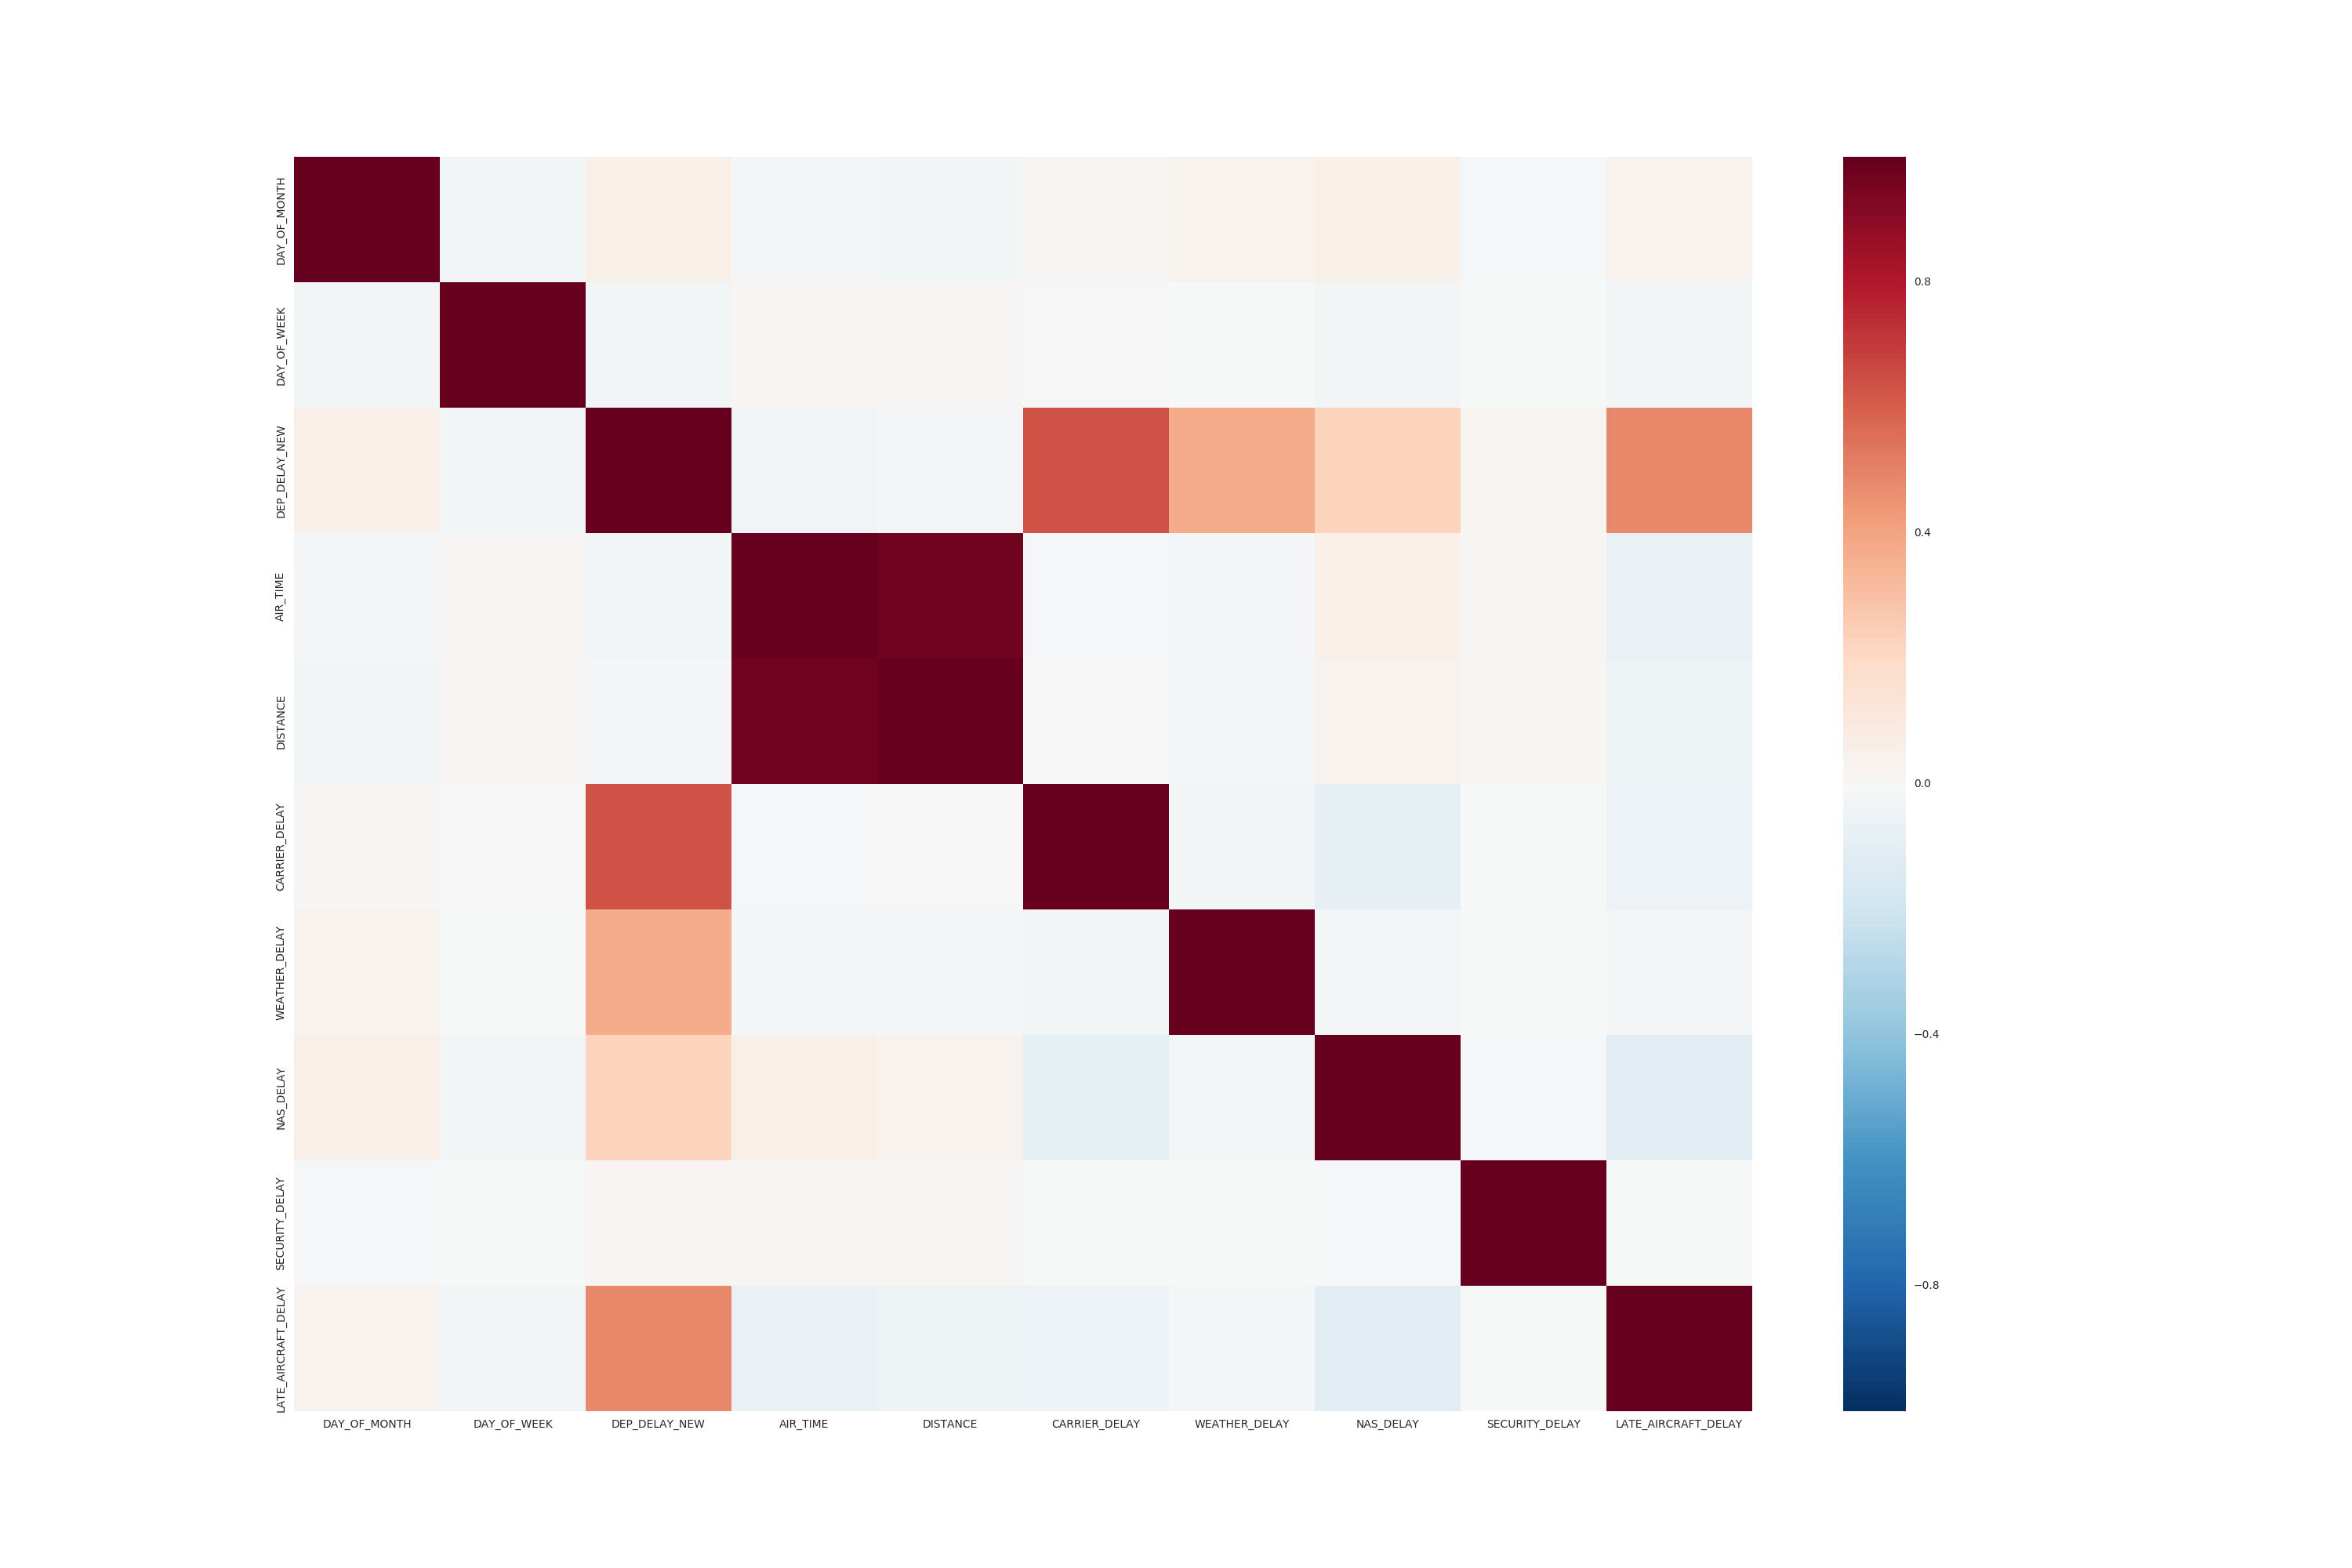

In [23]:
import matplotlib.pyplot as plt 
import seaborn as sns 

pdf = df1.toPandas()
fig, ax = plt.subplots()
fig.set_size_inches(30, 20)
corr = pdf.corr()
sns.heatmap(corr)
display(fig)

##Split the data set for training and testing

In [25]:
train_data, test_data  = df1.randomSplit([0.6, 0.4], 24)   # proportions [], seed for random

print("Number of training records: " + str(train_data.count()))
print("Number of testing records : " + str(test_data.count()))


Number of training records: 63033
Number of testing records : 42189

In [26]:
display(train_data.limit(5))

DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEP_DELAY_NEW,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
1.0,2.0,9E,30.0,44.0,229.0,29.0,0.0,0.0,0.0,0.0
1.0,2.0,AA,0.0,62.0,370.0,0.0,0.0,15.0,0.0,0.0
1.0,2.0,AA,0.0,89.0,601.0,0.0,0.0,21.0,0.0,0.0
1.0,2.0,AA,0.0,91.0,599.0,0.0,0.0,21.0,0.0,0.0
1.0,2.0,AA,0.0,93.0,647.0,0.0,0.0,27.0,0.0,0.0


##The old way to do this...

In [28]:
from pyspark.ml.feature import VectorAssembler,RFormula
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline, Model
from pyspark.ml.evaluation import RegressionEvaluator 
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder 

columns = df1.columns
# Not using DEP_DELAY_NEW (label) 
columns.remove('DEP_DELAY_NEW')


# with RFormula
#Predictor field is DEP_DELAY_NEW
formula = "{} ~ {}".format("DEP_DELAY_NEW", " + ".join(columns))
print("Formula : {}".format(formula))
rformula = RFormula(formula = formula)
lr = LinearRegression(labelCol ="label", featuresCol ="features")
# The ML pipeline
pipeline = Pipeline(stages=[rformula, lr])
fittedPipe = pipeline.fit(train_data)

Formula : DEP_DELAY_NEW ~ DAY_OF_MONTH + DAY_OF_WEEK + OP_UNIQUE_CARRIER + AIR_TIME + DISTANCE + CARRIER_DELAY + WEATHER_DELAY + NAS_DELAY + SECURITY_DELAY + LATE_AIRCRAFT_DELAY

In [29]:
fittedPipe = pipeline.fit(train_data)
fittedPipe.stages
lrModel1 = fittedPipe.stages[1]

## Data Modelling using 3 models
*  Efficiently run multiple pipelines in parameter grid

Models Used:

* Linear Regression
* Decision Tree
* Random Forest


Param Grid and Cross Validation are performed over the models

In [31]:
from pyspark.ml.feature import VectorAssembler,RFormula
from pyspark.ml.regression import LinearRegression , GeneralizedLinearRegression, DecisionTreeRegressor,RandomForestRegressor
from pyspark.ml import Pipeline, Model
from pyspark.ml.evaluation import RegressionEvaluator 
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder 

columns = df1.columns
# Not using DEP_DELAY_NEW (label) 
columns.remove('DEP_DELAY_NEW')

# with RFormula
#Predictor field is DEP_DELAY_NEW
formula = "{} ~ {}".format("DEP_DELAY_NEW", " + ".join(columns))
print("Formula : {}".format(formula))
rformula = RFormula(formula = formula)
# Pipeline basic to be shared across model fitting and testing
pipeline = Pipeline(stages=[])  # Must initialize with empty list!

# base pipeline (the processing here should be reused across pipelines)
basePipeline =[rformula]

#############################################################
# Specify Linear Regression model
lr = LinearRegression()
pl_lr = basePipeline + [lr]
pg_lr = ParamGridBuilder()\
          .baseOn({pipeline.stages: pl_lr})\
          .addGrid(lr.regParam,[0.01, .04])\
          .build()


#############################################################
# Specify Decision Tree model
dt = DecisionTreeRegressor()
pl_dt = basePipeline + [dt]
pg_dt = ParamGridBuilder()\
      .baseOn({pipeline.stages: pl_dt})\
      .build()
#############################################################
# Specify Random Forest  model
rff = RandomForestRegressor()
pl_rff = basePipeline + [rff]
pg_rff = ParamGridBuilder()\
      .baseOn({pipeline.stages: pl_rff})\
      .build()

# One grid from the individual grids
paramGrid = pg_lr + pg_dt + pg_rff

Formula : DEP_DELAY_NEW ~ DAY_OF_MONTH + DAY_OF_WEEK + OP_UNIQUE_CARRIER + AIR_TIME + DISTANCE + CARRIER_DELAY + WEATHER_DELAY + NAS_DELAY + SECURITY_DELAY + LATE_AIRCRAFT_DELAY

In [32]:
# The regression metric can be  rmse, r2
# See the metrics here https://spark.apache.org/docs/latest/mllib-evaluation-metrics.html#regression-model-evaluation
# Should run more than 3 folds, but here we simplify so that it will complete
cv = CrossValidator()\
      .setEstimator(pipeline)\
      .setEvaluator(RegressionEvaluator()\
                       .setMetricName("r2"))\
      .setEstimatorParamMaps(paramGrid)\
      .setNumFolds(3)

cvModel = cv.fit(df1)

## Best and Worst Model

In [34]:
import numpy as np
# RegressionEvaluator metric name is r2, so higher is better
# http://gim.unmc.edu/dxtests/roc3.htm
print("Best Model")
print(cvModel.getEstimatorParamMaps()[ np.argmax(cvModel.avgMetrics) ])
print("Worst Model")
print (cvModel.getEstimatorParamMaps()[ np.argmin(cvModel.avgMetrics) ])

Best Model
{Param(parent=u'LinearRegression_0e4b11f5e46d', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent=u'Pipeline_85bacfdf629e', name='stages', doc='a list of pipeline stages'): [RFormula_e093c0682c70, LinearRegression_0e4b11f5e46d]}
Worst Model
{Param(parent=u'Pipeline_85bacfdf629e', name='stages', doc='a list of pipeline stages'): [RFormula_e093c0682c70, RandomForestRegressor_cffd2626a1f7]}

##Data Transformation and Prediction from model
* The model is transformed and predictions from the models are made

In [36]:
## Make predictions on test documents. 
train_data, test_data  = df.randomSplit([0.6, 0.4], 24)   # proportions [], seed for random
# CrossValidator.fit() is in cvModel, which is the best model found.
predictions = cvModel.transform(test_data)
display(predictions.select('label', 'prediction').limit(100))
labeledprediction = cvModel.transform(test_data).select("label" , "prediction")

label,prediction
229.0,206.3461881595036
0.0,25.00518750410734
0.0,10.101190730728486
30.0,28.240022459929254
39.0,18.04187920018899
0.0,16.89953942977405
29.0,59.8025714876907
117.0,105.95553350396487
0.0,8.882896320713307
0.0,32.17985408398239


## To show the predicted results using scatter-plot for the best model

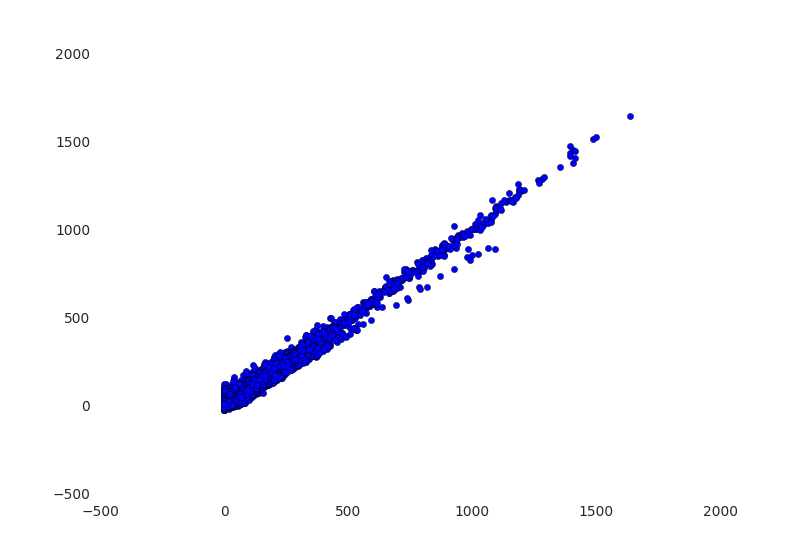

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
y_test,predictions = zip(*labeledprediction.collect())
fig, ax = plt.subplots()
plt.scatter(y_test,predictions)
display(fig)

##Prediction Summary

We are predicting the number of minutes the flight is been delayed based on DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,AIR_TIME,DISTANCE , CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY



Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.


Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.


Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. Delays that occur after Actual Gate Out are usually attributed to the NAS and are also reported through OPSNET.


Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.


Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

## Model Evaluation
* Model evaluations are done and then compared to find the Best and the worst performing model

In [41]:
# Summarize the model over the training set and print out some metrics
print("Best pipeline", cvModel.bestModel.stages)
print("Best model", cvModel.bestModel.stages[1])


('Best pipeline', [RFormula_e093c0682c70, LinearRegression_0e4b11f5e46d])
('Best model', LinearRegression_0e4b11f5e46d)

In [42]:
trainingSummary = lrModel1.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

lr = cvModel.bestModel.stages[1]
cvModel.bestModel.stages[1]
testsummary = lr.summary
print("RMSE: %f" % testsummary.rootMeanSquaredError)
print("r2: %f" % testsummary.r2)

RMSE: 17.466621
r2: 0.965433
RMSE: 17.368060
r2: 0.966143

##Model measures for plot

In [44]:
import re
def paramGrid_model_name(model):
  params = [v for v in model.values() if type(v) is not list]
  name = [v[-1] for v in model.values() if type(v) is list][0]
  name = re.match(r'([a-zA-Z]*)', str(name)).groups()[0]
  return "{}{}".format(name,params)

# Resulting metric and model description
# get the measure from the CrossValidator, cvModel.avgMetrics
# get the model name & params from the paramGrid
# put them together here:
measures = zip(cvModel.avgMetrics, [paramGrid_model_name(m) for m in paramGrid])
metrics,model_names = zip(*measures)

##Visualization of Model evaluation

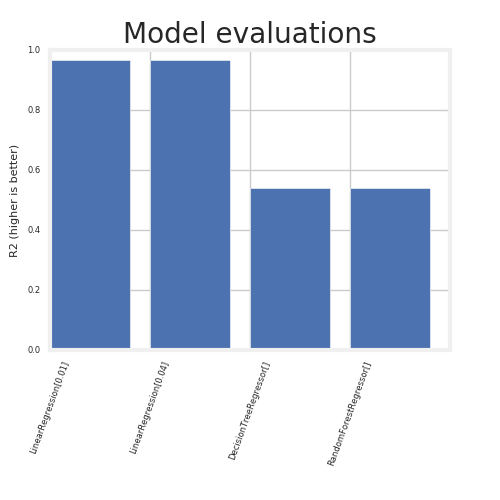

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf() # clear figure
fig = plt.figure( figsize=(5, 5))
plt.style.use('fivethirtyeight')
axis = fig.add_axes([0.1, 0.3, 0.8, 0.6])
# plot the metrics as Y
#plt.plot(range(len(model_names)),metrics)
plt.bar(range(len(model_names)),metrics)
# plot the model name & param as X labels
plt.xticks(range(len(model_names)), model_names, rotation=70, fontsize=6)
plt.yticks(fontsize=6)
#plt.xlabel('model',fontsize=8)
plt.ylabel('R2 (higher is better)',fontsize=8)
plt.title('Model evaluations')
display(plt.show())

##Results Explained

* Evaluation Summary

We have evaluated our models based on the values of r-square . R-square is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.
R2 value should be between 0 and 1.
'0' indicates that the model explains none of the variability of the response data around its mean and 1  indicates that the model explains all the variability of the response data around its mean.
The higher the R-squared, the better the model fits your data

The root-mean-squared error (RMSE) is a measure of how well the model performed. It does this by measuring difference between predicted values and the actual values.In a good model, the RMSE should be close for both  testing data and training data. If the RMSE for testing data is higher than the training data, there is a high chance that your model overfit. In other words, your model performed worse during testing than training.

###With the results of the evaluation, we observed that the Linear regression model is the best with the R2 value .96 ,while the random forest regressor is the worst model.Also we see that RMSE of the testing is less than the training data which ruled out overfitting and proves that our model is good.

## Data Visualization

##Top 10 carriers causing the maximum delay in departure


* OO-Skywest Airlines Inc.
* WN-Southwest Airlines Co.
* AA-American Airlines Inc.
* UA-United Air Lines Inc.
* DL-Delta Air Lines Inc.
* B6-JetBlue Airways
* YX-Republic Airline
* 9E-Endeavor Air
* MQ-American Eagle Airlines Inc.
* EV-Atlantic Southeast Airlines

In [50]:
from pyspark.sql.functions import desc
display(df1
  .select("OP_UNIQUE_CARRIER", "DEP_DELAY_NEW")
  .groupBy("OP_UNIQUE_CARRIER")
  .sum()
  .sort(desc("sum(DEP_DELAY_NEW)"))
  .limit(10))

OP_UNIQUE_CARRIER,sum(DEP_DELAY_NEW)
OO,1214460.0
WN,721558.0
AA,710631.0
UA,660584.0
DL,616585.0
B6,520147.0
YX,358297.0
9E,295506.0
MQ,279407.0
EV,235512.0


##Graph Frame

Import graph frame library

In [52]:
df2 = df.select("DAY_OF_WEEK","FL_DATE","OP_UNIQUE_CARRIER","ORIGIN_AIRPORT_ID","ORIGIN","ORIGIN_STATE_ABR","DEST_AIRPORT_ID","DEST","DEST_STATE_ABR","ARR_DELAY","AIR_TIME","DISTANCE","CARRIER_DELAY","NAS_DELAY","WEATHER_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY","ORIGIN_CITY_NAME","DEST_CITY_NAME","DEP_DELAY_NEW")
df2.registerTempTable("df2")

In [53]:
from pyspark.sql.functions import split
split_col = split(df2['ORIGIN_CITY_NAME'], ',')
df2 = df2.withColumn('city_src', split_col.getItem(0))

from pyspark.sql.functions import split
split_col = split(df2['DEST_CITY_NAME'], ',')
df2 = df2.withColumn('city_dst', split_col.getItem(0))

In [54]:
df2 = df2.drop("ORIGIN_CITY_NAME", "DEST_CITY_NAME")

In [55]:
display(df2)

DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST,DEST_STATE_ABR,ARR_DELAY,AIR_TIME,DISTANCE,CARRIER_DELAY,NAS_DELAY,WEATHER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_DELAY_NEW,city_src,city_dst
1,2019-01-28T00:00:00.000+0000,9E,13487,MSP,MN,11193,CVG,KY,229.0,86.0,596.0,0.0,11.0,218.0,0.0,0.0,218.0,Minneapolis,Cincinnati
5,2019-01-18T00:00:00.000+0000,9E,13495,MSY,LA,12953,LGA,NY,19.0,145.0,1183.0,0.0,19.0,0.0,0.0,0.0,0.0,New Orleans,New York
1,2019-01-21T00:00:00.000+0000,9E,13495,MSY,LA,12953,LGA,NY,19.0,144.0,1183.0,0.0,19.0,0.0,0.0,0.0,0.0,New Orleans,New York
2,2019-01-22T00:00:00.000+0000,9E,13495,MSY,LA,12953,LGA,NY,136.0,143.0,1183.0,136.0,0.0,0.0,0.0,0.0,142.0,New Orleans,New York
5,2019-01-25T00:00:00.000+0000,9E,13495,MSY,LA,12953,LGA,NY,154.0,132.0,1183.0,154.0,0.0,0.0,0.0,0.0,180.0,New Orleans,New York
2,2019-01-08T00:00:00.000+0000,9E,14100,PHL,PA,14492,RDU,NC,112.0,60.0,337.0,0.0,0.0,0.0,0.0,112.0,136.0,Philadelphia,Raleigh/Durham
5,2019-01-18T00:00:00.000+0000,9E,14100,PHL,PA,14492,RDU,NC,38.0,54.0,337.0,0.0,38.0,0.0,0.0,0.0,0.0,Philadelphia,Raleigh/Durham
1,2019-01-21T00:00:00.000+0000,9E,14100,PHL,PA,14492,RDU,NC,90.0,53.0,337.0,0.0,0.0,0.0,0.0,90.0,119.0,Philadelphia,Raleigh/Durham
5,2019-01-25T00:00:00.000+0000,9E,14100,PHL,PA,14492,RDU,NC,31.0,65.0,337.0,0.0,31.0,0.0,0.0,0.0,0.0,Philadelphia,Raleigh/Durham
2,2019-01-08T00:00:00.000+0000,9E,14492,RDU,NC,14100,PHL,PA,141.0,56.0,337.0,138.0,3.0,0.0,0.0,0.0,138.0,Raleigh/Durham,Philadelphia


## Renaming the columns of ORIGIN and DEST to src and dst for graph frames

In [57]:
df2 = df2.withColumnRenamed("ORIGIN","src")
df2 = df2.withColumnRenamed("DEST","dst")
df2 = df2.withColumnRenamed("ORIGIN_STATE_ABR","state_src")
df2 = df2.withColumnRenamed("DEST_STATE_ABR","state_dst")

In [58]:
from pyspark.sql.functions import lit
df2 = df2.withColumn("Country", lit("USA"))

In [59]:
df3 = df2.select("src", "city_src", "state_src", "Country").distinct()
df3 = df3.withColumnRenamed("city_src","City")
df3 = df3.withColumnRenamed("state_src","State")

In [60]:
display(df3)

src,City,State,Country
FAT,Fresno,CA,USA
HTS,Ashland,WV,USA
CMH,Columbus,OH,USA
DCA,Washington,VA,USA
PHX,Phoenix,AZ,USA
GUM,Guam,TT,USA
SLN,Salina,KS,USA
PAH,Paducah,KY,USA
COS,Colorado Springs,CO,USA
PSE,Ponce,PR,USA


## Creating Vertices and Edges for graphframes

Attach graphframe library to your cluster

In [62]:

from pyspark.sql.functions import *
from graphframes import GraphFrame

#Create Vertices (airports) and Edges (flights)
tripVertices = df3.withColumnRenamed("src", "id").distinct()
df2 = df2.withColumnRenamed("DEP_DELAY_NEW","delay")
tripEdges = df2.select("delay", "src", "dst", "city_dst", "state_dst")
tripEdges.registerTempTable("tripEdges")
#Cache Vertices and Edges
tripEdges.cache()
tripVertices.cache()

Out[ 35 ]: DataFrame[id: string, City: string, State: string, Country: string]

In [63]:
display(tripVertices)

id,City,State,Country
FAT,Fresno,CA,USA
HTS,Ashland,WV,USA
CMH,Columbus,OH,USA
DCA,Washington,VA,USA
PHX,Phoenix,AZ,USA
GUM,Guam,TT,USA
SLN,Salina,KS,USA
PAH,Paducah,KY,USA
COS,Colorado Springs,CO,USA
PSE,Ponce,PR,USA


In [64]:
display(tripEdges)

delay,src,dst,city_dst,state_dst
218.0,MSP,CVG,Cincinnati,KY
0.0,MSY,LGA,New York,NY
0.0,MSY,LGA,New York,NY
142.0,MSY,LGA,New York,NY
180.0,MSY,LGA,New York,NY
136.0,PHL,RDU,Raleigh/Durham,NC
0.0,PHL,RDU,Raleigh/Durham,NC
119.0,PHL,RDU,Raleigh/Durham,NC
0.0,PHL,RDU,Raleigh/Durham,NC
138.0,RDU,PHL,Philadelphia,PA


In [65]:
# Build `tripGraph` GraphFrame
# This GraphFrame builds up on the vertices and edges based on our trips (flights)
tripGraph = GraphFrame(tripVertices, tripEdges)
tripGraph.cache()

#Build `tripGraphPrime` GraphFrame
#This graphframe contains a smaller subset of data to make it easier to display motifs and subgraphs (below)
tripEdgesPrime = df2.select("delay", "src", "dst")
tripGraphPrime = GraphFrame(tripVertices, tripEdgesPrime)

In [66]:
tripGraph.vertices.count()

Out[ 39 ]: 344

In [67]:
tripGraph.edges.count()

Out[ 40 ]: 105222

##What destinations tend to have significant delays for flights departing from San Fransisco

In [69]:
display(tripGraph.edges.filter("src = 'SFO' and delay > 0"))

delay,src,dst,city_dst,state_dst
44.0,SFO,DFW,Dallas/Fort Worth,TX
82.0,SFO,DFW,Dallas/Fort Worth,TX
28.0,SFO,DFW,Dallas/Fort Worth,TX
79.0,SFO,PHX,Phoenix,AZ
74.0,SFO,PHX,Phoenix,AZ
74.0,SFO,PHX,Phoenix,AZ
15.0,SFO,PHX,Phoenix,AZ
109.0,SFO,PHX,Phoenix,AZ
7.0,SFO,ORD,Chicago,IL
115.0,SFO,ORD,Chicago,IL


##What flights departing from Atlanta are most likely to have significant delays

In [71]:
display(tripGraph.edges.filter("src = 'ATL' and delay > 0").groupBy("src", "dst").avg("delay").sort(desc("avg(delay)")))

src,dst,avg(delay)
ATL,HPN,178.45454545454547
ATL,SYR,149.28571428571428
ATL,GRB,142.5
ATL,BQK,141.0
ATL,EVV,135.625
ATL,EYW,129.8125
ATL,BDL,125.5
ATL,CHO,121.2
ATL,AVL,116.48275862068965
ATL,ORD,112.65217391304348


In [72]:
tripDelays = tripGraph.edges.where("DEP_DELAY > 0")
display(tripDelays)

delay,src,dst,city_dst,state_dst
218.0,MSP,CVG,Cincinnati,KY
142.0,MSY,LGA,New York,NY
180.0,MSY,LGA,New York,NY
136.0,PHL,RDU,Raleigh/Durham,NC
119.0,PHL,RDU,Raleigh/Durham,NC
138.0,RDU,PHL,Philadelphia,PA
122.0,RDU,PHL,Philadelphia,PA
5.0,MSY,LGA,New York,NY
232.0,MSY,LGA,New York,NY
106.0,MSY,LGA,New York,NY


## To determine the most popular flights (single city hops)

In [74]:
# Determine the most popular flights (single city hops)
import pyspark.sql.functions as func
topTrips = tripGraph \
  .edges \
  .groupBy("src", "dst") \
  .agg(func.count("delay").alias("trips"))
display(topTrips.orderBy(topTrips.trips.desc()).limit(20))

src,dst,trips
ORD,LGA,516
LGA,ORD,431
LAX,SFO,370
SFO,LAX,360
BOS,LGA,277
LGA,BOS,263
DCA,LGA,227
ATL,LGA,225
LAS,LAX,202
LGA,DCA,200


## To determining Airport ranking of importance using `pageRank`

In [76]:
# Determining Airport ranking of importance using `pageRank`
ranks = tripGraph.pageRank(resetProbability=0.15, maxIter=5)
display(ranks.vertices.orderBy(ranks.vertices.pagerank.desc()).limit(20))

id,City,State,Country,pagerank
ORD,Chicago,IL,USA,19.744444067928825
DFW,Dallas/Fort Worth,TX,USA,15.753910735323116
ATL,Atlanta,GA,USA,12.226466704114422
LGA,New York,NY,USA,11.309317256813449
DEN,Denver,CO,USA,10.587574590809375
SFO,San Francisco,CA,USA,10.00692867223813
LAX,Los Angeles,CA,USA,8.695587672925566
EWR,Newark,NJ,USA,8.376682035966166
CLT,Charlotte,NC,USA,8.023497088046808
IAH,Houston,TX,USA,6.684610311294704


##D3 Visualization

In [78]:
%scala
package d3a
// We use a package object so that we can define top level classes like Edge that need to be used in other cells

import org.apache.spark.sql._
import com.databricks.backend.daemon.driver.EnhancedRDDFunctions.displayHTML

case class Edge(src: String, dest: String, count: Long)

case class Node(name: String)
case class Link(source: Int, target: Int, value: Long)
case class Graph(nodes: Seq[Node], links: Seq[Link])

object graphs {
val sqlContext = SQLContext.getOrCreate(org.apache.spark.SparkContext.getOrCreate())
import sqlContext.implicits._

def force(clicks: Dataset[Edge], height: Int = 100, width: Int = 960): Unit = {
  val data = clicks.collect()
  val nodes = (data.map(_.src) ++ data.map(_.dest)).map(_.replaceAll("_", " ")).toSet.toSeq.map(Node)
  val links = data.map { t =>
    Link(nodes.indexWhere(_.name == t.src.replaceAll("_", " ")), nodes.indexWhere(_.name == t.dest.replaceAll("_", " ")), t.count / 20 + 1)
  }
  showGraph(height, width, Seq(Graph(nodes, links)).toDF().toJSON.first())
}

/**
 * Displays a force directed graph using d3
 * input: {"nodes": [{"name": "..."}], "links": [{"source": 1, "target": 2, "value": 0}]}
 */
def showGraph(height: Int, width: Int, graph: String): Unit = {

displayHTML(s"""<!DOCTYPE html>
<html>
  <head>
    <link type="text/css" rel="stylesheet" href="https://mbostock.github.io/d3/talk/20111116/style.css"/>
    <style type="text/css">
      #states path {
        fill: #ccc;
        stroke: #fff;
      }

      path.arc {
        pointer-events: none;
        fill: none;
        stroke: #000;
        display: none;
      }

      path.cell {
        fill: none;
        pointer-events: all;
      }

      circle {
        fill: steelblue;
        fill-opacity: .8;
        stroke: #fff;
      }

      #cells.voronoi path.cell {
        stroke: brown;
      }

      #cells g:hover path.arc {
        display: inherit;
      }
    </style>
  </head>
  <body>
    <script src="https://mbostock.github.io/d3/talk/20111116/d3/d3.js"></script>
    <script src="https://mbostock.github.io/d3/talk/20111116/d3/d3.csv.js"></script>
    <script src="https://mbostock.github.io/d3/talk/20111116/d3/d3.geo.js"></script>
    <script src="https://mbostock.github.io/d3/talk/20111116/d3/d3.geom.js"></script>
    <script>
      var graph = $graph;
      var w = $width;
      var h = $height;

      var linksByOrigin = {};
      var countByAirport = {};
      var locationByAirport = {};
      var positions = [];

      var projection = d3.geo.azimuthal()
          .mode("equidistant")
          .origin([-98, 38])
          .scale(1400)
          .translate([640, 360]);

      var path = d3.geo.path()
          .projection(projection);

      var svg = d3.select("body")
          .insert("svg:svg", "h2")
          .attr("width", w)
          .attr("height", h);

      var states = svg.append("svg:g")
          .attr("id", "states");

      var circles = svg.append("svg:g")
          .attr("id", "circles");

      var cells = svg.append("svg:g")
          .attr("id", "cells");

      var arc = d3.geo.greatArc()
          .source(function(d) { return locationByAirport[d.source]; })
          .target(function(d) { return locationByAirport[d.target]; });

      d3.select("input[type=checkbox]").on("change", function() {
        cells.classed("voronoi", this.checked);
      });

      // Draw US map.
      d3.json("https://mbostock.github.io/d3/talk/20111116/us-states.json", function(collection) {
        states.selectAll("path")
          .data(collection.features)
          .enter().append("svg:path")
          .attr("d", path);
      });

      // Parse links
      graph.links.forEach(function(link) {
        var origin = graph.nodes[link.source].name;
        var destination = graph.nodes[link.target].name;

        var links = linksByOrigin[origin] || (linksByOrigin[origin] = []);
        links.push({ source: origin, target: destination });

        countByAirport[origin] = (countByAirport[origin] || 0) + 1;
        countByAirport[destination] = (countByAirport[destination] || 0) + 1;
      });

      d3.csv("https://mbostock.github.io/d3/talk/20111116/airports.csv", function(data) {

        // Build list of airports.
        var airports = graph.nodes.map(function(node) {
          return data.find(function(airport) {
            if (airport.iata === node.name) {
              var location = [+airport.longitude, +airport.latitude];
              locationByAirport[airport.iata] = location;
              positions.push(projection(location));

              return true;
            } else {
              return false;
            }
          });
        });

        // Compute the Voronoi diagram of airports' projected positions.
        var polygons = d3.geom.voronoi(positions);

        var g = cells.selectAll("g")
            .data(airports)
          .enter().append("svg:g");

        g.append("svg:path")
            .attr("class", "cell")
            .attr("d", function(d, i) { return "M" + polygons[i].join("L") + "Z"; })
            .on("mouseover", function(d, i) { d3.select("h2 span").text(d.name); });

        g.selectAll("path.arc")
            .data(function(d) { return linksByOrigin[d.iata] || []; })
          .enter().append("svg:path")
            .attr("class", "arc")
            .attr("d", function(d) { return path(arc(d)); });

        circles.selectAll("circle")
            .data(airports)
            .enter().append("svg:circle")
            .attr("cx", function(d, i) { return positions[i][0]; })
            .attr("cy", function(d, i) { return positions[i][1]; })
            .attr("r", function(d, i) { return Math.sqrt(countByAirport[d.iata]); })
            .sort(function(a, b) { return countByAirport[b.iata] - countByAirport[a.iata]; });
      });
    </script>
  </body>
</html>""")
  }

  def help() = {
displayHTML("""
<p>
Produces a force-directed graph given a collection of edges of the following form:</br>
<tt><font color="#a71d5d">case class</font> <font color="#795da3">Edge</font>(<font color="#ed6a43">src</font>: <font color="#a71d5d">String</font>, <font color="#ed6a43">dest</font>: <font color="#a71d5d">String</font>, <font color="#ed6a43">count</font>: <font color="#a71d5d">Long</font>)</tt>
</p>
<p>Usage:<br/>
<tt>%scala</tt></br>
<tt><font color="#a71d5d">import</font> <font color="#ed6a43">d3._</font></tt><br/>
<tt><font color="#795da3">graphs.force</font>(</br>
&nbsp;&nbsp;<font color="#ed6a43">height</font> = <font color="#795da3">500</font>,<br/>
&nbsp;&nbsp;<font color="#ed6a43">width</font> = <font color="#795da3">500</font>,<br/>
&nbsp;&nbsp;<font color="#ed6a43">clicks</font>: <font color="#795da3">Dataset</font>[<font color="#795da3">Edge</font>])</tt>
</p>""")
  }
}


Warning: classes defined within packages cannot be redefined without a cluster restart.
Compilation successful.
<notebook>:15: warning: method getOrCreate in object SQLContext is deprecated: Use SparkSession.builder instead
val sqlContext = SQLContext.getOrCreate(org.apache.spark.SparkContext.getOrCreate())
 ^

In [79]:
tripDelays.registerTempTable("clicks")

In [80]:
display(tripDelays)

delay,src,dst,city_dst,state_dst
218.0,MSP,CVG,Cincinnati,KY
142.0,MSY,LGA,New York,NY
180.0,MSY,LGA,New York,NY
136.0,PHL,RDU,Raleigh/Durham,NC
119.0,PHL,RDU,Raleigh/Durham,NC
138.0,RDU,PHL,Philadelphia,PA
122.0,RDU,PHL,Philadelphia,PA
5.0,MSY,LGA,New York,NY
232.0,MSY,LGA,New York,NY
106.0,MSY,LGA,New York,NY


##Showing number of flights which got delayed from philadelphia
Note:To see the delay route click on the blue node.
The size of the node is big, as many flights got delayed from philadelphia.

In [82]:
%scala
import d3a._
graphs.force(
  height = 800,
  width = 1200,
  clicks = sql("""select src, dst as dest, count(1) as count from clicks where src in ('PHL') and  delay>0 group by src, dst """).as[Edge])

<!DOCTYPE html>

## Conclusion

This project and the analysis retrieved are useful not only for passengers point of view but for every decision-maker in the aviation industry.  Apart from the financial losses incurred by the industry, flight delay also portray a negative reputation of the airlines and decreases their reliability. This project can be used as a prototype by any aviation authority for their benefit; it can work as an efficient model to study delay analysis, based on the dataset.  This project has encompassed and showed the importance of  Various Analysis in Machine  Learning,  Data  Mining Concepts for efficient data cleaning,  Cross  Validation technique, and Regularization in ML for making proper models and its predictive analysis.

##Recommendations

The results can be utilised by the airline companies to improve their functioning in order to perform better on the delays caused by Carrier Delay or Aircraft delay i.e. factors which could be controlled by the airlines in some way. For the other delay causes, which may not be directly controlled by airlines can be used to find alternative routes and services to improve customer satisfaction. Along with the airlines, the results of the analysis can also be utilised to recommend the best airlines that can be chosen by customers traveling on different routes and at different times. Customers can make use of the analysis and take more informed decisions based on the results.

In [85]:
%sh
wget https://raw.githubusercontent.com/circulosmeos/gdown.pl/master/gdown.pl
chmod +x gdown.pl

--2019-05-04 13:14:39-- https://raw.githubusercontent.com/circulosmeos/gdown.pl/master/gdown.pl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.52.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.52.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2072 (2.0K) [text/plain]
Saving to: ‘gdown.pl’

 0K .. 100% 5.80M=0s

2019-05-04 13:14:40 (5.80 MB/s) - ‘gdown.pl’ saved [2072/2072]

In [86]:
%sh
./gdown.pl https://drive.google.com/open?id=1xAJiBigkSifAS2bsbfSsc-y44CMVDTMQ ML2_tableau.twb
ls

Cannot open cookies file ‘gdown.cookie.temp’: No such file or directory
--2019-05-04 13:14:40-- https://docs.google.com/uc?id=1xAJiBigkSifAS2bsbfSsc-y44CMVDTMQ&export=download
Resolving docs.google.com (docs.google.com)... 216.58.193.78, 2607:f8b0:4005:80a::200e
Connecting to docs.google.com (docs.google.com)|216.58.193.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-cc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/utpgu1bon6r2m4diq1dvqo8s5m78a8o9/1556971200000/14465001325950989533/*/1xAJiBigkSifAS2bsbfSsc-y44CMVDTMQ?e=download [following]
Warning: wildcards not supported in HTTP.
--2019-05-04 13:14:40-- https://doc-0o-cc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/utpgu1bon6r2m4diq1dvqo8s5m78a8o9/1556971200000/14465001325950989533/*/1xAJiBigkSifAS2bsbfSsc-y44CMVDTMQ?e=download
Resolving doc-0o-cc-docs.googleusercontent.com (doc-0o-cc-docs.googleusercontent.com)... 172.217.14.225, 2607:f8b0:400a:800::2001
Connecting to doc-0o-cc-docs.googleusercontent.com (doc-0o-cc-docs.googleusercontent.com)|172.217.14.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 309905 (303K) [text/xml]
Saving to: ‘ML2_tableau.twb’

 0K 100% 10.3M=0.03s

2019-05-04 13:14:41 (10.3 MB/s) - ‘ML2_tableau.twb’ saved [309905/309905]

conf
derby.log
eventlogs
gdown.pl
logs
m1
m1project.csv
m1.zip
ML2_tableau.twb

### We downloaded the tableau files but unable to show here as it requires ODBC connection , so we have attached our findings as screen shot along with tableau original file in submission